# Group Work 6
## Group 6:
- Claudia Vivas
- Eljaer Eusebio
- Andre Tapia
- Luis Sandoval

## INTRODUCTION

We provide an additional empirical example of partialling-out with Lasso to estimate the regression coefficient $\beta_1$ in the high-dimensional linear regression model:
  $$
  Y = \beta_1 D +  \beta_2'W + \epsilon.
  $$
  
Specifically, we are interested in how the rates  at which economies of different countries grow ($Y$) are related to the initial wealth levels in each country ($D$) controlling for country's institutional, educational, and other similar characteristics ($W$).
  
The relationship is captured by $\beta_1$, the *speed of convergence/divergence*, which measures the speed at which poor countries catch up $(\beta_1< 0)$ or fall behind $(\beta_1> 0)$ rich countries, after controlling for $W$. Our inference question here is: do poor countries grow faster than rich countries, controlling for educational and other characteristics? In other words, is the speed of convergence negative: $ \beta_1 <0?$ This is the Convergence Hypothesis predicted by the Solow Growth Model. This is a structural economic model. Under some strong assumptions, that we won't state here, the predictive exercise we are doing here can be given causal interpretation.

The outcome $Y$ is the realized annual growth rate of a country's wealth  (Gross Domestic Product per capita). The target regressor ($D$) is the initial level of the country's wealth. The target parameter $\beta_1$ is the speed of convergence, which measures the speed at which poor countries catch up with rich countries. The controls ($W$) include measures of education levels, quality of institutions, trade openness, and political stability in the country.

In [1]:
# Import relevant packages
import pandas as pd
import numpy as np
import pyreadr
from sklearn import preprocessing
import patsy

from numpy import loadtxt

import hdmpy
import numpy as np
import random
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV, ElasticNetCV
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import itertools
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
from pandas.api.types import is_categorical_dtype
from itertools import compress
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.feature_selection import SelectFromModel

In [3]:
# I downloaded the data that the author used
growth_read = pyreadr.read_r("C:/Users/edfra/OneDrive/Documentos/GitHub/ECO224/Labs/data/GrowthData.RData")

# Extracting the data frame from rdata_read
growth = growth_read[ 'GrowthData' ]
list(growth)

['Outcome',
 'intercept',
 'gdpsh465',
 'bmp1l',
 'freeop',
 'freetar',
 'h65',
 'hm65',
 'hf65',
 'p65',
 'pm65',
 'pf65',
 's65',
 'sm65',
 'sf65',
 'fert65',
 'mort65',
 'lifee065',
 'gpop1',
 'fert1',
 'mort1',
 'invsh41',
 'geetot1',
 'geerec1',
 'gde1',
 'govwb1',
 'govsh41',
 'gvxdxe41',
 'high65',
 'highm65',
 'highf65',
 'highc65',
 'highcm65',
 'highcf65',
 'human65',
 'humanm65',
 'humanf65',
 'hyr65',
 'hyrm65',
 'hyrf65',
 'no65',
 'nom65',
 'nof65',
 'pinstab1',
 'pop65',
 'worker65',
 'pop1565',
 'pop6565',
 'sec65',
 'secm65',
 'secf65',
 'secc65',
 'seccm65',
 'seccf65',
 'syr65',
 'syrm65',
 'syrf65',
 'teapri65',
 'teasec65',
 'ex1',
 'im1',
 'xr65',
 'tot1']

In [4]:
growth.shape

(90, 63)

In [5]:
# Create main variables
Y = growth['Outcome']
W = growth.drop(['Outcome','intercept', 'gdpsh465'], 1 )
D = growth['gdpsh465']

## OLS without controlling countries features

In [6]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [7]:
reg_ols  = sm.OLS(Y, D).fit()
print(reg_ols.summary())

                                 OLS Regression Results                                
Dep. Variable:                Outcome   R-squared (uncentered):                   0.438
Model:                            OLS   Adj. R-squared (uncentered):              0.432
Method:                 Least Squares   F-statistic:                              69.38
Date:                Sat, 27 Nov 2021   Prob (F-statistic):                    9.13e-13
Time:                        12:53:36   Log-Likelihood:                          139.82
No. Observations:                  90   AIC:                                     -277.6
Df Residuals:                      89   BIC:                                     -275.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [8]:
modelPred = reg_ols.predict(D)
print(modelPred)

0     0.038409
1     0.039797
2     0.051831
3     0.044082
4     0.041735
        ...   
85    0.052390
86    0.046762
87    0.052618
88    0.051658
89    0.051932
Length: 90, dtype: float64


In [9]:
modelPred_1 = reg_ols.predict(Y)
print(modelPred_1)

0    -0.000142
1     0.000585
2     0.000391
3     0.000373
4     0.000163
        ...   
85    0.000182
86    0.000199
87    0.000273
88    0.000232
89    0.000237
Length: 90, dtype: float64


In [10]:
meanSquaredError_1=mean_squared_error(Y, modelPred_1)
print("MSE:", meanSquaredError_1)
rootMeanSquaredError_1 = sqrt(meanSquaredError_1)
print("RMSE:", rootMeanSquaredError_1)

MSE: 0.004606308488854489
RMSE: 0.06786979069405245


In [11]:
meanSquaredError=mean_squared_error(D, modelPred)
print("MSE:", meanSquaredError)
rootMeanSquaredError = sqrt(meanSquaredError)
print("RMSE:", rootMeanSquaredError)

MSE: 59.430289303277206
RMSE: 7.7091043126473


In [12]:
# output: estimated regression coefficient corresponding to the target regressor
est_ols = reg_ols.summary2().tables[1]['Coef.']['gdpsh465']

# output: std. error
std_ols = reg_ols.summary2().tables[1]['Std.Err.']['gdpsh465']

# output: 95% confidence interval
lower_ci = reg_ols.summary2().tables[1]['[0.025']['gdpsh465']
upper_ci = reg_ols.summary2().tables[1]['0.975]']['gdpsh465']

In [13]:
table_1 = np.zeros( (1, 4) )

table_1[0,0] = est_ols  
table_1[0,1] = std_ols   
table_1[0,2] = lower_ci
table_1[0,3] = upper_ci    


table_1_pandas = pd.DataFrame( table_1, columns = [ "Estimator","Std. Error", "lower bound CI", "upper bound CI"  ])
table_1_pandas.index = [ "OLS" ]
table_1_html = table_1_pandas.to_html()
table_1_html

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>Estimator</th>\n      <th>Std. Error</th>\n      <th>lower bound CI</th>\n      <th>upper bound CI</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>OLS</th>\n      <td>0.005827</td>\n      <td>0.0007</td>\n      <td>0.004437</td>\n      <td>0.007217</td>\n    </tr>\n  </tbody>\n</table>'

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>Estimator</th>\n      <th>Std. Error</th>\n      <th>lower bound CI</th>\n      <th>upper bound CI</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>OLS</th>\n      <td>0.005827</td>\n      <td>0.0007</td>\n      <td>0.004437</td>\n      <td>0.007217</td>\n    </tr>\n  </tbody>\n</table>'

In [14]:
model = "Y ~ D + W"

## OLS controlling countries features

In [ ]:
control_ols = smf.ols( model , data=growth).fit()
Y_predict=control_ols.predict('Y')
D_predict=control_ols.predict('D')
control_ols_table = control_ols.summary2().tables[1]
print( control_ols_table.iloc[ 1 , 4:] )
control_ols_table.iloc[1, :]

In [15]:
# output: estimated regression coefficient corresponding to the target regressor
est_control_ols = control_ols.summary2().tables[1]['Coef.']['D']

# output: std. error
std_control_ols = control_ols.summary2().tables[1]['Std.Err.']['D']

# output: 95% confidence interval
lower_control_ci = control_ols.summary2().tables[1]['[0.025']['D']
upper_control_ci = control_ols.summary2().tables[1]['0.975]']['D']

In [16]:
table_2 = np.zeros( (1, 4) )

table_2[0,0] = est_control_ols  
table_2[0,1] = std_control_ols   
table_2[0,2] = lower_control_ci
table_2[0,3] = upper_control_ci    


table_2_pandas = pd.DataFrame( table_2, columns = [ "Estimator","Std. Error", "lower bound CI", "upper bound CI"  ])
table_2_pandas.index = [ "OLS WITH CONTROL VARIABLES" ]
table_2_html = table_2_pandas.to_html()
table_2_html

ERROR! Session/line number was not unique in database. History logging moved to new session 904


'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>Estimator</th>\n      <th>Std. Error</th>\n      <th>lower bound CI</th>\n      <th>upper bound CI</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>OLS WITH CONTROL VARIABLES</th>\n      <td>-0.009378</td>\n      <td>0.029888</td>\n      <td>-0.0706</td>\n      <td>0.051844</td>\n    </tr>\n  </tbody>\n</table>'

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>Estimator</th>\n      <th>Std. Error</th>\n      <th>lower bound CI</th>\n      <th>upper bound CI</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>OLS WITH CONTROL VARIABLES</th>\n      <td>-0.009378</td>\n      <td>0.029888</td>\n      <td>-0.0706</td>\n      <td>0.051844</td>\n    </tr>\n  </tbody>\n</table>'

In [17]:
table_3_pandas = table_1_pandas.append(table_2_pandas)
table_3_pandas

,Estimator,Std. Error,lower bound CI,upper bound CI
OLS,0.005827,0.000700,0.004437,0.007217
OLS WITH CONTROL VARIABLES,-0.009378,0.029888,-0.070600,0.051844


## DML algorithm

In [18]:
def DML2_for_PLM(z, d, y, dreg, yreg, nfold):
    
    # Num ob observations
    nobs = z.shape[0]
    
    # Define folds indices 
    list_1 = [*range(0, nfold, 1)]*nobs
    sample = np.random.choice(nobs,nobs, replace=False).tolist()
    foldid = [list_1[index] for index in sample]

    # Create split function(similar to R)
    def split(x, f):
        count = max(f) + 1
        return tuple( list(itertools.compress(x, (el == i for el in f))) for i in range(count) ) 

    # Split observation indices into folds 
    list_2 = [*range(0, nobs, 1)]
    I = split(list_2, foldid)
    
    # Create array to save errors 
    dtil = np.zeros( len(z) ).reshape( len(z) , 1 )
    ytil = np.zeros( len(z) ).reshape( len(z) , 1 )
    
    # loop to save results
    for b in range(0,len(I)):
    
        # Split data - index to keep are in mask as booleans
        include_idx = set(I[b])  #Here should go I[b] Set is more efficient, but doesn't reorder your elements if that is desireable
        mask = np.array([(i in include_idx) for i in range(len(z))])

        # Lasso regression, excluding folds selected 
        dfit = dreg(z[~mask,], d[~mask,])
        yfit = yreg(z[~mask,], y[~mask,])

        # predict estimates using the 
        dhat = dfit.predict( z[mask,] )
        yhat = yfit.predict( z[mask,] )

        # save errors  
        dtil[mask] =  d[mask,] - dhat.reshape( len(I[b]) , 1 )
        ytil[mask] = y[mask,] - yhat.reshape( len(I[b]) , 1 )
        print(b, " ")
    
    # Create dataframe 
    data_2 = pd.DataFrame(np.concatenate( ( ytil, dtil), axis = 1), columns = ['ytil','dtil'])
   
    # OLS
    model = "ytil ~ dtil"
    baseline_ols = smf.ols(model , data = data_2 ).fit()
    coef_est = baseline_ols.summary2().tables[1]['Coef.']['dtil']
    se = baseline_ols.summary2().tables[1]['Std.Err.']['dtil']
    
    Final_result = { 'coef_est' : coef_est , 'se' : se , 'dtil' : dtil , 'ytil' : ytil }

    print("Coefficient is {}, SE is equal to {}".format(coef_est, se))
    
    return Final_result
    

In [19]:
# Create main variables
Y = growth['Outcome']
Z = growth.drop(['Outcome','intercept', 'gdpsh465'], 1 )
D = growth['gdpsh465']

In [20]:
# as matrix
y = Y.to_numpy().reshape( len(Y) , 1 )
d = D.to_numpy().reshape( len(Y) , 1 )
z = Z.to_numpy()

## Lasso Using scikit-learn

In [21]:
def dreg(z,d):
    alpha=0.00000001
    result = linear_model.Lasso(alpha = alpha).fit(z, d)
    return result

def yreg(z,y):
    alpha=0.00000001
    result = linear_model.Lasso(alpha = alpha).fit(z, y)
    return result

DML2_lasso = DML2_for_PLM(z, d, y, dreg, yreg, 10)

0  
1  
2  
3  
4  
5  
6  
7  
8  
9  
Coefficient is 0.0217287076655043, SE is equal to 0.012128297447856248


C:\Users\edfra\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6919965143854218, tolerance: 0.006743098766859467
  model = cd_fast.enet_coordinate_descent(
C:\Users\edfra\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012663967050114687, tolerance: 2.2173975078871656e-05
  model = cd_fast.enet_coordinate_descent(
C:\Users\edfra\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6314758218971854, tolerance: 0.0060398497889589675
  model = cd_fast.enet_coordinate_descent(
C:\Users\edfra\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: 

## Post - Lasso Using scikit-learn

In [22]:
class Lasso_post:
    
    def __init__(self, alpha ):
        self.alpha = alpha

        
    def fit( self, X, Y ):
        self.X = X
        self.Y = Y
        lasso = linear_model.Lasso( alpha = self.alpha ).fit( X , Y )
        model = SelectFromModel( lasso , prefit = True )
        X_new = model.transform( X )
        # Gettin indices from columns which has variance for regression
        index_X = model.get_support()
        
        self.index = index_X
        new_x = X[ : ,  index_X ]
        
        lasso2 = linear_model.Lasso( alpha = self.alpha ).fit( new_x , Y )
        self.model = lasso2
        
        return self
    
    def predict( self , X ):
        
        dropped_X = X[ : , self.index ]
        
        predictions = self.model.predict( dropped_X )
        
        return predictions

In [23]:
def dreg(z,d):
    alpha=0.00000001
    result = Lasso_post( alpha = alpha ).fit( z , d )
    return result

def yreg( z , y ):
    alpha = 0.00000001
    result = Lasso_post( alpha = alpha ).fit( z , y )
    return result

DML2_lasso_post = DML2_for_PLM(z, d, y, dreg, yreg, 10)

C:\Users\edfra\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8726500504203516, tolerance: 0.006218272348523787
  model = cd_fast.enet_coordinate_descent(
C:\Users\edfra\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.9143869049469882, tolerance: 0.006218272348523787
  model = cd_fast.enet_coordinate_descent(
C:\Users\edfra\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013500728704989943, tolerance: 2.1163833203880877e-05
  model = cd_fast.enet_coordinate_descent(


0  
1  
2  


C:\Users\edfra\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013842118788721203, tolerance: 2.1163833203880877e-05
  model = cd_fast.enet_coordinate_descent(
C:\Users\edfra\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8169046968965679, tolerance: 0.006381486543206947
  model = cd_fast.enet_coordinate_descent(
C:\Users\edfra\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8153147118421357, tolerance: 0.006381486543206947
  model = cd_fast.enet_coordinate_descent(
C:\Users\edfra\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: C

3  
4  
5  
6  
7  
8  
9  
Coefficient is 0.01910653454912545, SE is equal to 0.011977754499598993


C:\Users\edfra\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6586923759713587, tolerance: 0.006415766715988015
  model = cd_fast.enet_coordinate_descent(
C:\Users\edfra\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6628677968254878, tolerance: 0.006415766715988015
  model = cd_fast.enet_coordinate_descent(
C:\Users\edfra\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.014776778458235593, tolerance: 2.1943041703337408e-05
  model = cd_fast.enet_coordinate_descent(
C:\Users\edfra\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: C

## DML Elastic Net

In [24]:
class standard_skl_model:
    
    def __init__(self, model ):
        self.model = model
       
    def fit( self, X, Y ):
        
        # Standarization of X and Y
        self.scaler_X = StandardScaler()
        self.scaler_X.fit( X )
        std_X = self.scaler_X.transform( X )
                
        self.model.fit( std_X , Y )
                
        return self
    
    def predict( self , X ):
        
        self.scaler_X = StandardScaler()
        self.scaler_X.fit( X )
        std_X = self.scaler_X.transform( X )
        
        prediction = self.model.predict( std_X )
        
        return prediction

In [25]:
# DML with cross-validated Elastic Net:
def dreg(z,d):
    result = standard_skl_model( ElasticNetCV( cv = 10 , random_state = 0 , l1_ratio = 0.5, max_iter = 100000 ) ).fit( z, d )
    return result

def yreg(z,y):
    result = standard_skl_model( ElasticNetCV( cv = 10 , random_state = 0 , l1_ratio = 0.5, max_iter = 100000 ) ).fit( z, y )
    return result

DML2_elnet = DML2_for_PLM(z, d, y, dreg, yreg, 2)

C:\Users\edfra\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\edfra\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0  


C:\Users\edfra\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\edfra\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


1  
Coefficient is -0.03580322751069835, SE is equal to 0.014902554610102349


## DML RIDGE 

In [26]:
#DML with cross-validated Ridge:
def dreg(z,d):
    result = standard_skl_model( ElasticNetCV( cv = 10 ,  random_state = 0 , l1_ratio = 0.0001 ) ).fit( z, d )
    return result

def yreg(z,y):
    result = standard_skl_model( ElasticNetCV( cv = 10 , random_state = 0 , l1_ratio = 0.0001 ) ).fit( z, y )
    return result

DML2_ridge = DML2_for_PLM(z, d, y, dreg, yreg, 2)

C:\Users\edfra\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\edfra\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0  


C:\Users\edfra\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\edfra\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


1  
Coefficient is -0.023908352710682722, SE is equal to 0.009335300413556713


## DML RANDOM FOREST

In [27]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [28]:
#DML with Random Forest:
def dreg(z,d):
    result = RandomForestRegressor( random_state = 0 , n_estimators = 500 , max_features = 31 , n_jobs = 4 , min_samples_leaf = 5 ).fit( z, d )
    return result

def yreg(z,y):
    result = RandomForestRegressor( random_state = 0 , n_estimators = 500 , max_features = 31 , n_jobs = 4 , min_samples_leaf = 5 ).fit( z, y )
    return result

DML2_RF = DML2_for_PLM(z, d, y, dreg, yreg, 2)   # set to 2 due to computation time

<ipython-input-28-b8cf5d622d9e>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  result = RandomForestRegressor( random_state = 0 , n_estimators = 500 , max_features = 31 , n_jobs = 4 , min_samples_leaf = 5 ).fit( z, d )
<ipython-input-28-b8cf5d622d9e>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  result = RandomForestRegressor( random_state = 0 , n_estimators = 500 , max_features = 31 , n_jobs = 4 , min_samples_leaf = 5 ).fit( z, y )


0  


<ipython-input-28-b8cf5d622d9e>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  result = RandomForestRegressor( random_state = 0 , n_estimators = 500 , max_features = 31 , n_jobs = 4 , min_samples_leaf = 5 ).fit( z, d )
<ipython-input-28-b8cf5d622d9e>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  result = RandomForestRegressor( random_state = 0 , n_estimators = 500 , max_features = 31 , n_jobs = 4 , min_samples_leaf = 5 ).fit( z, y )


1  
Coefficient is -0.03614180524886038, SE is equal to 0.012307752645816284


In [29]:
mods = [DML2_lasso, DML2_lasso_post , DML2_ridge, DML2_elnet, DML2_RF]
mods_name = [ "DML2_lasso", "DML2_lasso_post" , 'DML2_ridge', 'DML2_elnet', 'DML2_RF']

def mdl( model , model_name ):
    
    RMSEY = np.sqrt( np.mean( model[ 'ytil' ] ) ** 2 ) # I have some doubts about these equations...we have to recheck
    RMSED = np.sqrt( np.mean( model[ 'dtil' ] ) ** 2 ) # I have some doubts about these equations...we have to recheck
    
    result = pd.DataFrame( { model_name : [ RMSEY , RMSED ]} , index = [ 'RMSEY' , 'RMSED' ])
    return result

RES = [ mdl( model , name ) for model, name in zip( mods , mods_name ) ]
    

pr_Res = pd.concat( RES, axis = 1)

pr_Res

,DML2_lasso,DML2_lasso_post,DML2_ridge,DML2_elnet,DML2_RF
RMSEY,0.005385,0.000904,5.396917e-18,3.006854e-18,0.001296
RMSED,0.007191,0.003270,2.269789e-16,1.263187e-15,0.060884


In [30]:
table_4 = np.zeros( (2, 2) )

table_4[0,0] = rootMeanSquaredError_1
table_4[0,1] = 0
table_4[1,0] = rootMeanSquaredError
table_4[1,1] = 0 #I couldn't find RMSED for this regression


table_4_pandas = pd.DataFrame( table_4, columns = [ "OLS","OLS WITH COUNTRIES CHARACTERISTICS"])
table_4_pandas.index = [ "RMSEY","RMSED" ]
table_4_html = table_4_pandas.to_html()
table_4_html

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>OLS</th>\n      <th>OLS WITH COUNTRIES CHARACTERISTICS</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>RMSEY</th>\n      <td>0.067870</td>\n      <td>0.0</td>\n    </tr>\n    <tr>\n      <th>RMSED</th>\n      <td>7.709104</td>\n      <td>0.0</td>\n    </tr>\n  </tbody>\n</table>'

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>OLS</th>\n      <th>OLS WITH COUNTRIES CHARACTERISTICS</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>RMSEY</th>\n      <td>0.067870</td>\n      <td>0.0</td>\n    </tr>\n    <tr>\n      <th>RMSED</th>\n      <td>0.051175</td>\n      <td>0.0</td>\n    </tr>\n  </tbody>\n</table>'

#### This verfies that the function DML2_for_PLM has no errors

In [31]:
np.where(DML2_lasso_post[ 'ytil' ] == 0)[0].size

0

## It looks like the best method for predicting D is CV Ridge, and the best method for predicting Y is CV Ridge. I had this conclusion because Ridge regression has the lowest value in Root Mean Squared Error for Y and D.

In [32]:
#DML with the BEST:
def dreg(z,d):
    result = standard_skl_model( ElasticNetCV( cv = 10 ,  random_state = 0 , l1_ratio = 0.0001 ) ).fit( z, d )
    return result

def yreg(z,y):
    result = standard_skl_model( ElasticNetCV( cv = 10 , random_state = 0 , l1_ratio = 0.0001 ) ).fit( z, y )
    return result

DML2_best= DML2_for_PLM(z, d, y, dreg, yreg, 2)

C:\Users\edfra\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\edfra\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0  


C:\Users\edfra\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\edfra\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


1  
Coefficient is -0.011258784538348516, SE is equal to 0.00962518150385828


In [33]:
table = np.zeros( ( 8 , 2 ))
table[ 0 , 0] = est_ols
table[ 1 , 0] = std_ols
table[ 2 , 0] = DML2_lasso['coef_est']
table[ 3 , 0] = DML2_lasso_post['coef_est']
table[ 4 , 0] = DML2_ridge['coef_est']
table[ 5 , 0] = DML2_elnet['coef_est']
table[ 6 , 0] = DML2_RF['coef_est']
table[ 7 , 0] = DML2_best['coef_est']
table[ 0 , 1] = est_control_ols
table[ 1 , 1] = std_control_ols
table[ 2 , 1] = DML2_lasso['se']
table[ 3 , 1] = DML2_lasso_post['se']
table[ 4 , 1] = DML2_ridge['se']
table[ 5 , 1] = DML2_elnet['se']
table[ 6 , 1] = DML2_RF['se']
table[ 7 , 1] = DML2_best['se']

In [34]:
table = pd.DataFrame( table , index = [ "OLS", "OLS with countries characteristics", "Lasso", \
             "Post-Lasso", "CV Ridge", "CV Elnet", "Random Forest", "Best" ] , \
            columns = ["Estimate","Standard Error"] )
table.round( 3 )

,Estimate,Standard Error
OLS,0.006,-0.009
OLS with countries characteristics,0.001,0.030
Lasso,0.022,0.012
Post-Lasso,0.019,0.012
CV Ridge,-0.024,0.009
CV Elnet,-0.036,0.015
Random Forest,-0.036,0.012
Best,-0.011,0.010


In [35]:
table.to_latex()

'\\begin{tabular}{lrr}\n\\toprule\n{} &  Estimate &  Standard Error \\\\\n\\midrule\nOLS                                &  0.005827 &       -0.009378 \\\\\nOLS with countries characteristics &  0.000700 &        0.029888 \\\\\nLasso                              &  0.021729 &        0.012128 \\\\\nPost-Lasso                         &  0.019107 &        0.011978 \\\\\nCV Ridge                           & -0.023908 &        0.009335 \\\\\nCV Elnet                           & -0.035803 &        0.014903 \\\\\nRandom Forest                      & -0.036142 &        0.012308 \\\\\nBest                               & -0.011259 &        0.009625 \\\\\n\\bottomrule\n\\end{tabular}\n'

## CONCLUSIONS

In conclusion, Cross -validation Ridge Regression is the best method in comparison with the other ones (OLS, OLS with controllers, Lasso, Post- Lasso, CV Elnet & Random Forest), because it give us the lowest RMSE in Y and D matrix variables.
According to CV Ridge, our coefficient is $\beta_1 = -0.030$, which means that poor countries grow faster than rich countries.

# EXTRA

In [36]:
coef_df = table

In [38]:
coef_df["lower bound CI"]= coef_df["Estimate"]-( 1.96*coef_df["Standard Error"]/9.48)
coef_df

,Estimate,Standard Error,lower bound CI
OLS,0.005827,-0.009378,0.007766
OLS with countries characteristics,0.000700,0.029888,-0.005480
Lasso,0.021729,0.012128,0.019221
Post-Lasso,0.019107,0.011978,0.016630
CV Ridge,-0.023908,0.009335,-0.025838
CV Elnet,-0.035803,0.014903,-0.038884
Random Forest,-0.036142,0.012308,-0.038686
Best,-0.011259,0.009625,-0.013249


In [39]:
variables = list(coef_df.index.values)
variables

['OLS',
 'OLS with countries characteristics',
 'Lasso',
 'Post-Lasso',
 'CV Ridge',
 'CV Elnet',
 'Random Forest',
 'Best']

In [40]:
coef_df['variables'] = variables
coef_df

,Estimate,Standard Error,lower bound CI,variables
OLS,0.005827,-0.009378,0.007766,OLS
OLS with countries characteristics,0.000700,0.029888,-0.005480,OLS with countries characteristics
Lasso,0.021729,0.012128,0.019221,Lasso
Post-Lasso,0.019107,0.011978,0.016630,Post-Lasso
CV Ridge,-0.023908,0.009335,-0.025838,CV Ridge
CV Elnet,-0.035803,0.014903,-0.038884,CV Elnet
Random Forest,-0.036142,0.012308,-0.038686,Random Forest
Best,-0.011259,0.009625,-0.013249,Best


In [42]:
errors = coef_df['Estimate'] - coef_df['lower bound CI']

In [43]:
coef_df['errors'] = errors

<ipython-input-44-b166271fc906>:17: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  ax.scatter(x=pd.np.arange(coef_df.shape[0]),


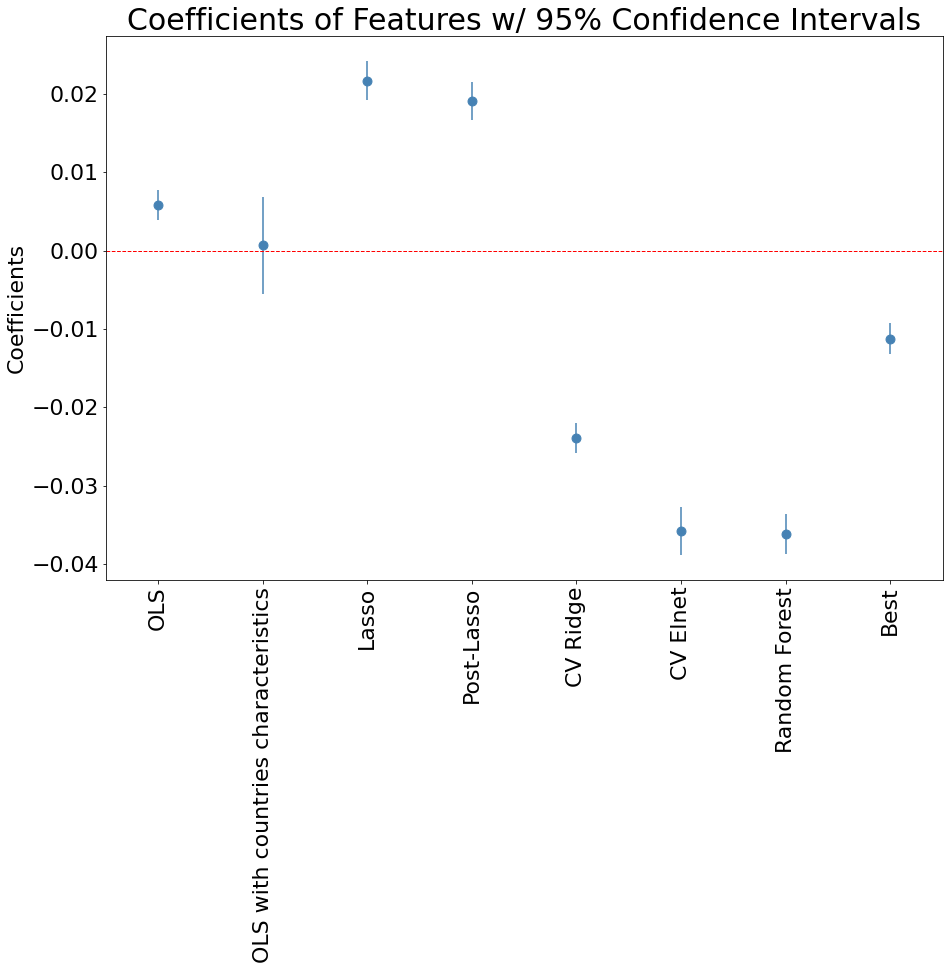

In [44]:
# Define figure, axes, and plot
fig, ax = plt.subplots(figsize=(15, 10))
    
# Error bars for 95% confidence interval
# Can increase capsize to add whiskers
coef_df.plot(x='variables', y='Estimate', kind='bar',
            ax=ax, color='none', fontsize=22, 
            ecolor='steelblue',capsize=0,
            yerr='errors', legend=False)
    
# Set title & labels
plt.title('Coefficients of Features w/ 95% Confidence Intervals',fontsize=30)
ax.set_ylabel('Coefficients',fontsize=22)
ax.set_xlabel('',fontsize=22)
    
# Coefficients
ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
         marker='o', s=80, 
         y=coef_df['Estimate'], color='steelblue')
    
# Line to define zero on the y-axis
ax.axhline(y=0, linestyle='--', color='red', linewidth=1)
plt.show()

## CONCLUSIONS

- First of all, all of methods used are significant, except OLS with countries characteristics
- Secondly, OLS, Lasso and Post - Lasso models tell us that the poor countries do not grow faster than rich countries ($ \beta >0 $). However, Cross Validation Ridge, Cross Valdiation Elnet and Random Forest model tell us that poor countries do grow fast than rich countries ($ \beta <0 $)